In [1]:
#Dependencies
import numpy as np
from csv import reader
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [2]:
#the csv upload function

def csvFileUpload(filename):
    dataset = []
    with open(filename, 'r') as file:
        csvReader = reader(file, delimiter = ',')
        for row in csvReader:
            if not row:
                continue
            dataset.append(row)
        del(dataset[0])
        for row in dataset:
            del(row[4])
    return dataset

In [3]:
#Testing the csvUpload
filename = '/Users/pw/Desktop/Machine Learning/mlwork/iris.csv'
dataset = csvFileUpload(filename)

In [4]:
dataset[0]

['5.1', '3.5', '1.4', '0.2']

In [5]:
#Changing the string values to float values
def stringToFloat(dataset):
    for column in range(len(dataset[0])):
        for row in dataset:
            row[column] = float(row[column].strip())
    return dataset        

In [6]:
data = stringToFloat(dataset)

In [7]:
data[0]

[5.1, 3.5, 1.4, 0.2]

In [11]:
colors = 10*["b","r","g","c","m","y","k"]

In [8]:
#The K-means class
class k_means():
    def __init__(self, k = 3, tol = 0.01, maxIter = 100):
        self.k = k
        self.tol = tol
        self.maxIter = 100
        
    def fit(self,data):
            
        self.centroids = {}
            
        for i in range(self.k):
            self.centroids[i] = data[i]
                
        for i in range(self.maxIter):
            self.classifications = {}
                
            for i in range(self.k):
                self.classifications[i] = []
            #Calculating the distances
                
            for feature in data:
                distances = [np.linalg.norm(feature - self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(feature)
                    
            prevCentroids = dict(self.centroids)    
            #Calculate the new centroids based off the classifications      
            
            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification], axis = 0)
                
                
            optimized = True
                
            for c in self.centroids:
                originalCentroid = prevCentroids[c]
                currentCentroid = self.centroids[c]
                    
                if np.sum((currentCentroid - originalCentroid)/originalCentroid * 100) > self.tol:
                    print(np.sum((currentCentroid - originalCentroid)/originalCentroid * 100))
                    optimized = False
                    
                
            if optimized:
                break
                    
    def predict(self,data):
            
        distances = [np.linalg.norm(data - self.centroids[centroid]) for centroid in self.centroid]
        classification = distances.index(min(distances))
            
        return classification
                    


In [9]:
dataArray = np.asarray(data)
type(dataArray)

numpy.ndarray

In [10]:
X = dataArray[:,:2]

14.471167777455854
2.2027210884353554
1.6994207961505632
0.3306595895334805
9.633479146331165
0.4620139048077303
1.2105966006675006
4.973687779113586
0.859060365798457
2.010321369927284
0.6734561797532584
0.6844940053965529
1.139746476433797
0.3433820100640357
0.25252166269335685


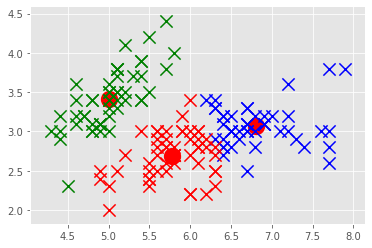

In [17]:
c = k_means()

c.fit(X)

for centroid in c.centroids:
    plt.scatter(c.centroids[centroid][0], c.centroids[centroid][1], color = "r", marker = "o",
               linewidths = 5, s = 150)
    

for classification in c.classifications:
    color = colors[classification]
    for feature in c.classifications[classification]:
        plt.scatter(feature[0],feature[1], color = color, marker = "x", linewidths = 5, s = 150)

plt.show()


    